# Machine Learning - Regressions

In [101]:
#base modules
import numpy as np
import pandas as pd

#visualization modules
from matplotlib import pyplot as plt
import seaborn as sns

In [105]:
#import dataset
nhanes = pd.read_csv("nhanes.csv")

### Reminder of our first contact with regressions for bivariate analysis of two numeric variables

In [106]:
#SciPy module
from scipy.stats import linregress

In [107]:
#Lets consider a simple linear regression with 2 variables -> weight and height
#first we need to pull out those 2 variables
nhanes_reg = nhanes[['Weight', 'Height']]

In [108]:
nhanes_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20293 entries, 0 to 20292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  19405 non-null  float64
 1   Height  18035 non-null  float64
dtypes: float64(2)
memory usage: 317.2 KB


In [111]:
#next we need to remove any rows with missing values for a proper regression
nhanes_reg.dropna(inplace=True) #using the inplace=True ensures we overwrite the variable

In [110]:
nhanes_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 20292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  18014 non-null  float64
 1   Height  18014 non-null  float64
dtypes: float64(2)
memory usage: 422.2 KB


In [11]:
#next we do a regression
slope, intercept, rvalue, pvalue, stderr = linregress(y=nhanes_reg['Weight'], x=nhanes_reg['Height'])

In [12]:
print("The slope is", round(slope, 4)) #the m in the y=mx+c equation
print("The intercept is at", round(intercept, 4)) # the c in the y=mx+c equation
print("The correlation is", round(rvalue, 4)) # same as Pearsons Correlation Coefficient
print("The p-value is", round(pvalue, 4)) #lets us know if there is statistcal significance in the correlation and a value < 0.05 means there is significance



The slope is 1.0006
The intercept is at -89.5919
The correlation is 0.7969
The p-value is 0.0


In [13]:
#We could also explore the correlation using pandas
nhanes_reg.corr()

,Weight,Height
Weight,1.000000,0.796947
Height,0.796947,1.000000


### Using the stats module for more complex regressions 

In [14]:
from statsmodels.formula.api import ols

In [15]:
regression = ols("Weight ~ Height", nhanes_reg).fit()

In [16]:
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                 3.135e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        17:59:24   Log-Likelihood:                -77541.
No. Observations:               18014   AIC:                         1.551e+05
Df Residuals:                   18012   BIC:                         1.551e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -89.5919      0.891   -100.508      0.0

In [17]:
# Here we see the output corresponds to what we got from scipy.stats.linregress
# slope (Weight coeff) = -89.5919, 
# Intercept (Intercept coeff) = 1.006
# Correlation R-squared =  0.796947**2 = 0.635 
# P-value = 0.000

### The advantage with statsmodels is it will allow us include more predictors!
- First we need to determine what we want to include in our model by carrying out some bivariate analysis with what we want to predict which is Weight  
- We can simply build a correlation matrix for the whole dataset and find those variables that have the strongest correlation preferrably R-squared to remove directionality with Weight
- Then visualize in a heatmap or clusterplot

<AxesSubplot:>

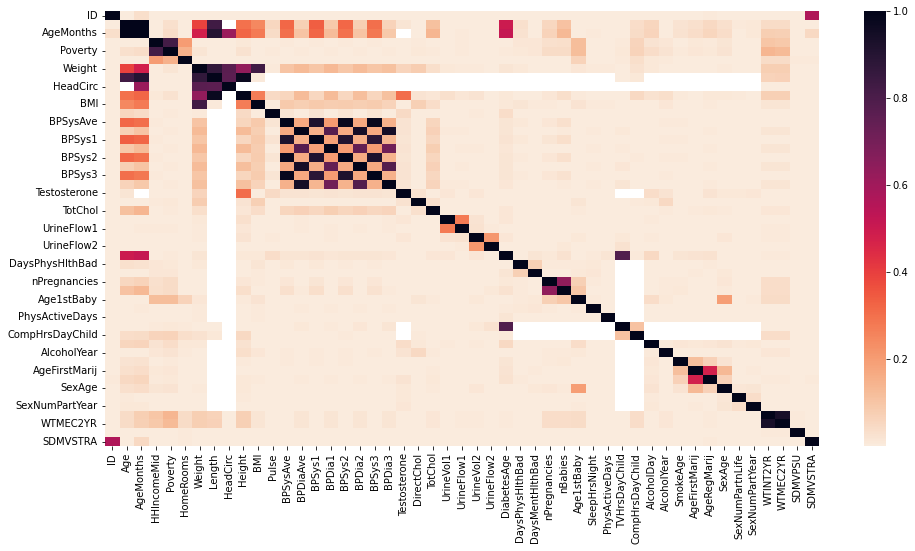

In [92]:
#I recommend removing those things you already know are not predictive before plotting your heatmap
#for our example we will include all
r = nhanes.corr()
r2 = np.square(r)
plt.figure(figsize=(16, 8))
sns.heatmap(r2, cmap=sns.cm.rocket_r)

In [19]:
nhanes_reg2 = nhanes[['Weight', 'Age', 'AgeMonths', 'Length', 'HeadCirc', 'Height', 'BMI']]

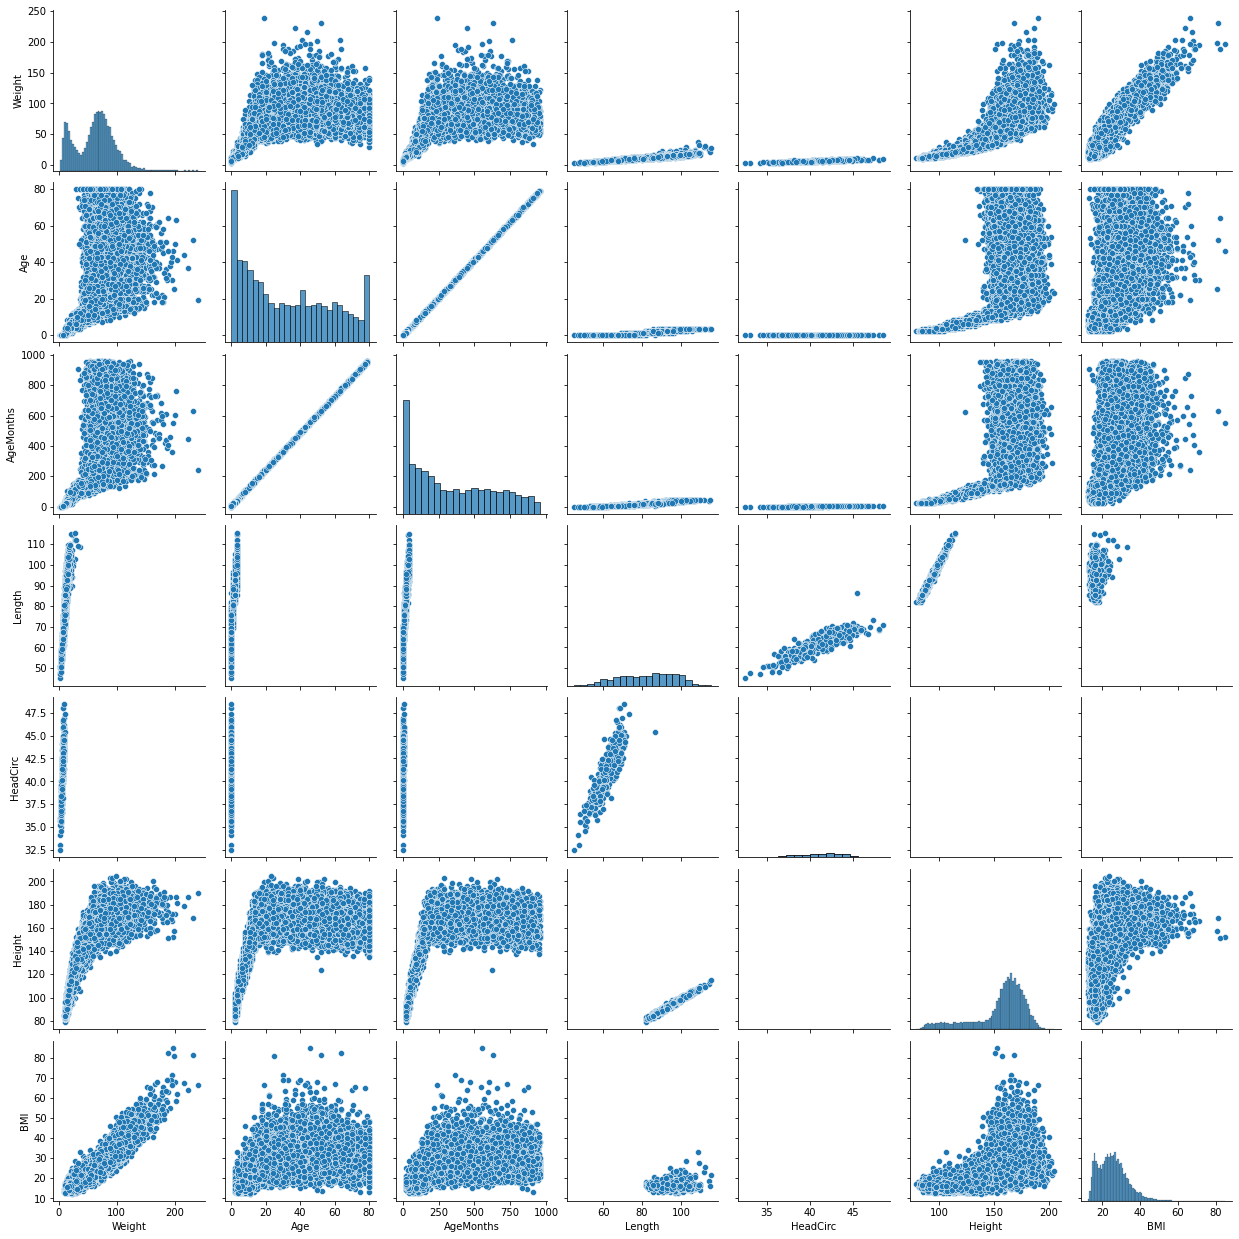

In [20]:
#we can next view a pair plot to see how they are related
# we see that age and agemonths are perfectly correlated and can tell one is derrived from the other so we can drop one. 
#Also length, and head circumference is limited as it is mainly for babies so we may consider droping that except we want to explore for babies
sns.pairplot(nhanes_reg2)

In [22]:
nhanes_reg2.drop(['AgeMonths', 'Length', 'HeadCirc'], axis=1, inplace=True)

In [23]:
nhanes_reg2.corr()

,Weight,Age,Height,BMI
Weight,1.000000,0.626415,0.796947,0.911194
Age,0.626415,1.000000,0.545593,0.497744
Height,0.796947,0.545593,1.000000,0.520037
BMI,0.911194,0.497744,0.520037,1.000000


In [24]:
#Next we build the model
regression2 = ols("Weight ~ Age + Height + BMI", nhanes_reg2).fit()

In [25]:
print(regression2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.251e+05
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        18:00:00   Log-Likelihood:                -53739.
No. Observations:               18014   AIC:                         1.075e+05
Df Residuals:                   18010   BIC:                         1.075e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -89.2706      0.256   -348.442      0.0

In [26]:
# Here we see that the p-values for all coefficients are all significant and hence predictive
# We can also inteprete the regression result here by saying:
# For every unit increase in Age, Weight decreases by 0.0402 units
# For every unit increase in Height, Weight increases by 0.572 units
# For every unit increase in BMI, Weight increases by 2.6476 units

### Including Non numeric variables in the regression
- We need to convert these to some numeric form that can be pluged into an equation 
- This is done by converting to "dummy" variables 
- First we need to establish if there is some relationship 

In [27]:
#Lets look at the nhanes dataset again and lets consider Race1, Gender, Depressed and SmokeNow
# Lets compare them visually

<AxesSubplot:xlabel='Race1', ylabel='Weight'>

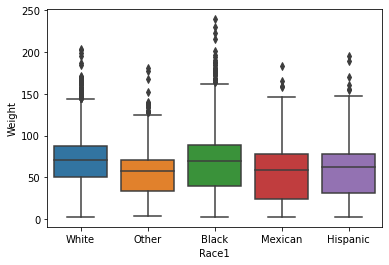

In [28]:
sns.boxplot(data=nhanes, y='Weight', x='Race1' ) #there is a difference in means so wwe keep this

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

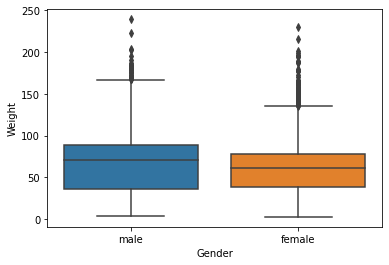

In [29]:
sns.boxplot(data=nhanes, y='Weight', x='Gender' ) #there is a difference in means so wwe keep this

<AxesSubplot:xlabel='Depressed', ylabel='Weight'>

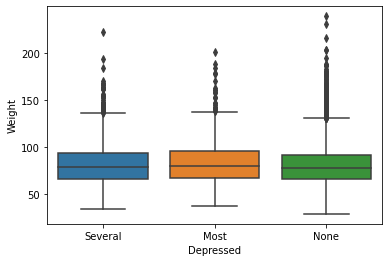

In [30]:
sns.boxplot(data=nhanes, y='Weight', x='Depressed' ) #there is no obvious difference in means so we dicard

<AxesSubplot:xlabel='SmokeNow', ylabel='Weight'>

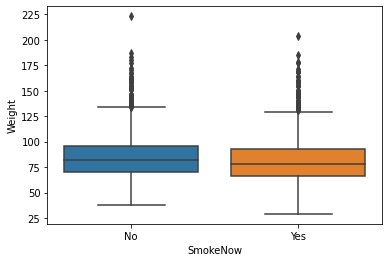

In [31]:
sns.boxplot(data=nhanes, y='Weight', x='SmokeNow' ) #there is a difference in means so we keep this

In [32]:
#Next is convert each one to dummy variables

In [33]:
dummies = pd.get_dummies(nhanes[['Race1', 'Gender', 'SmokeNow']], drop_first=True)
#the removed category is called the reference category. Inthis case Blacks, Femals and Non Smokers

In [34]:
#next lets rename the columsn to something meaningful
dummies.rename(columns={'Race1_Hispanic':'Hispanic', 'Race1_Mexican':'Mexican', 'Race1_Other': 'Other', 'Race1_White':'White', 'Gender_male': 'Male', 'SmokeNow_Yes':'Smoker'}, inplace=True)

In [35]:
#next lets get the numeric variables
numvars = nhanes[['Weight', 'Age', 'BMI', 'Height']]

In [36]:
#now lets merge them
nhanes_reg3 = pd.concat([numvars, dummies], axis=1)

In [37]:
nhanes_reg3.head(3)

,Weight,Age,BMI,Height,Hispanic,Mexican,Other,White,Male,Smoker
0,87.4,34,32.22,164.7,0,0,0,1,1,0
1,17.0,4,15.30,105.4,0,0,1,0,1,0
2,72.3,16,22.00,181.3,0,0,0,0,1,0


In [38]:
#Now we can plug into a regression equation and see how they impact on Weight
regression3 = ols("Weight ~ Age + Height + BMI + Hispanic + Mexican + White + Other + Male + Smoker", nhanes_reg3).fit()

In [39]:
print(regression3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 9.402e+04
Date:                Sun, 01 May 2022   Prob (F-statistic):               0.00
Time:                        18:00:27   Log-Likelihood:                -51754.
No. Observations:               18014   AIC:                         1.035e+05
Df Residuals:                   18004   BIC:                         1.036e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -86.5501      0.244   -354.274      0.0

In [40]:
#True to our expectation they are all strongly predictive
# Interpertation
# For every unit increase in Age, Weight decreases by 0.034 units
# For every unit increase in Height, Weight increases by 0.5343 units
# For every unit increase in BMI, Weight increases by 2.7006 units
# Hispanics weigh 1.6471 less than Blacks
# Whites weigh 1.905 less than Blacks
# Other races weigh 0.9029 less than Blacks
# Males weigh 4.0640 more than Females
# Smokers weigh 0.425 more than non smokers

# Now lets go to the SKLearn module for Machine Learning

In [41]:
### Lets start by pre processing using the data above 
### First we want to explore the data for missingness

In [42]:
#create a missingness matrix
missingness = nhanes_reg3.isnull()

<AxesSubplot:>

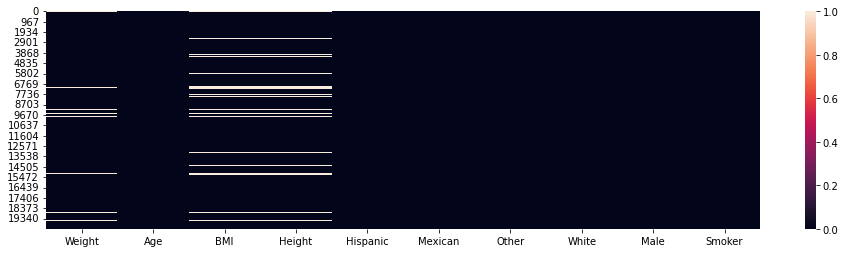

In [43]:
#plot the matrix
plt.figure(figsize=(16, 4))
sns.heatmap(missingness)
#We see some missingness in BMI.
#We can drop BMI before the regression or we can input values like the mean value 
# Same for weight
#Now lets take both approaches by droping records with missing Weight and inputing mean values for missing BMI

In [44]:
#drop records missing weight
nhanes_reg3 = nhanes_reg3.loc[~nhanes_reg3['Weight'].isna()]

<AxesSubplot:>

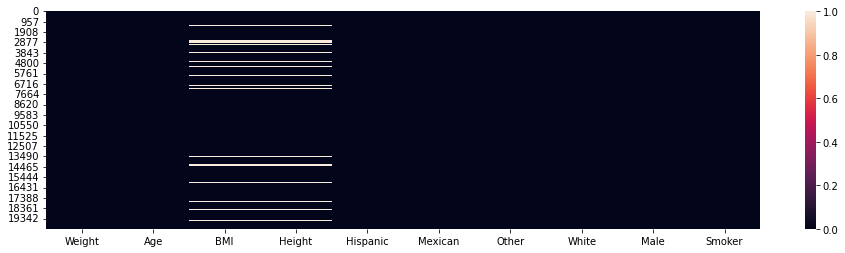

In [45]:
plt.figure(figsize=(16, 4))
sns.heatmap(nhanes_reg3.isnull())

In [61]:
#Now lets input using the mean values for BMI and height
nhanes_reg3.loc[nhanes_reg3['BMI'].isna(), 'BMI'] = nhanes_reg3['BMI'].mean()
nhanes_reg3.loc[nhanes_reg3['Height'].isna(), 'Height'] = nhanes_reg3['Height'].mean()

<AxesSubplot:>

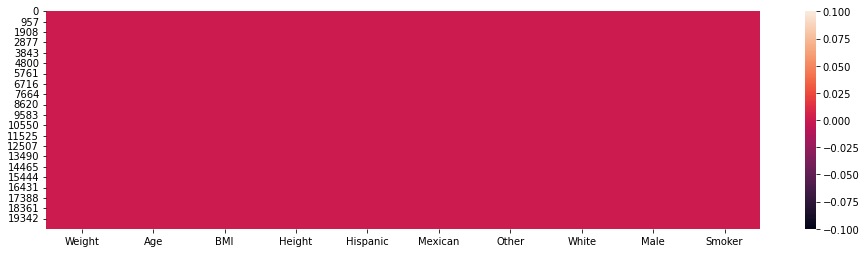

In [64]:
plt.figure(figsize=(16, 4))
sns.heatmap(nhanes_reg3.isnull())

In [65]:
#Now we are sert for pre processing for the Regression Algorithm

### Preprocessing
- Separating the label from the features
- Import the module (from sklearn.model_selection import train_test_split)
- Creating the train test split

In [66]:
#Separating the label from the features
label = nhanes_reg3['Weight']
features = nhanes_reg3.drop('Weight', axis=1)

In [67]:
#importing the needed module
from sklearn.model_selection import train_test_split

In [72]:
#creating the splits for training then test and validation
training_features, test_validation_features, training_labels, test_validation_labels = train_test_split(features, label, test_size=0.3, random_state=101)

In [73]:
#training pair
print(training_features.shape)
print(training_labels.shape)

(13583, 9)
(13583,)


In [74]:
#now lets create the test, validation split
test_features, validation_features, test_labels, validation_labels = train_test_split(test_validation_features, test_validation_labels, test_size=0.5, random_state=101)

In [77]:
#validation pair
print(validation_features.shape)
print(validation_labels.shape)

(2911, 9)
(2911,)


In [79]:
#Test Pair
print(test_features.shape)
print(test_labels.shape)

(2911, 9)
(2911,)


### Linear Regression Algorithm
1. From the family import the algorithm (from sklearn.linear_model import LogisticRegresion)
2. Initialize the algorithm (mlr = LinearRegression)
3. Train the algorithm (mlr.fit(training_features, training_labels))
4. Predict! (predicted_labels = mlr.predict(validation_features))
5. Check the accuracy of the model
6. Steps 3 to 5 may be iterative till we have a resonable fit and finally replace step 4 with the test set 

In [80]:
#import algorithm
from sklearn.linear_model import LinearRegression

In [81]:
#initialize the algorithm
mlr = LinearRegression()

In [83]:
#train the model
mlr.fit(training_features, training_labels)

LinearRegression()

In [84]:
#predict
predicted_labels = mlr.predict(validation_features)

### Validating the model

<AxesSubplot:ylabel='Weight'>

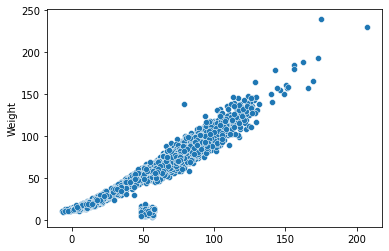

In [86]:
#Visual
sns.scatterplot(x=predicted_labels, y=validation_labels)

In [87]:
#using metrics - Root Mean Square Error
from sklearn import metrics

In [89]:
mean_square_error = metrics.mean_squared_error(predicted_labels, validation_labels)

In [90]:
root_mean_square_error = np.sqrt(mean_square_error)

In [91]:
root_mean_square_error

13.831056898991022